In [15]:
from transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt
from config import get_from_config, save_to_config

In [2]:
def get_tot(energy_MeV):
    wiggler = Wiggler(K_peak=get_from_config("K_peak"), N_periods=10)
    x_max = 0.007257142857142857
    y_max = x_max/np.sqrt(2)
    n_x = 512
    n_y = int(n_x/np.sqrt(2))
    n_l = 300
    l_min = 0.85
    l_max = 1.3
    x_step = x_max/(n_x-1/2)
    y_step = y_max/(n_y-1/2)
    l_step = (l_max-l_min)/(n_l-1)
    mesh = (np.linspace(x_step/2, x_max, n_x),
            np.linspace(y_step/2, y_max, n_y),
            np.linspace(l_min, l_max, n_l))
    spectral_transmission = transmission_function(mesh[2])
    wr_sim = WigglerRadiationSimulator(
        wiggler,
        mesh,
        gamma=energy_MeV/0.511,
        harmonics=[1,2],
        aperture='ellipse',
        only_calc_sum_of_both_polarizations=True,  # if False, then both polarizations are calculated separately
        spectral_transmission=spectral_transmission
        )
    wr_sim.calc_photon_flux_on_meshgrid()
    return 4*wr_sim.get_total_photon_flux()


In [7]:
energy_list = np.linspace(95, 105, 11)
# tot_flux_list = [get_tot(en) for en in energy_list]

In [8]:
tot_flux_list = [0.005685387270458406,
 0.006773477006755702,
 0.007972336903823372,
 0.009163038752354987,
 0.010286071578426315,
 0.011330268973952376,
 0.012306371051446763,
 0.013225639120243457,
 0.014090812033119245,
 0.01489733025159413,
 0.015637482367814454]

In [9]:
meas = get_from_config("Measured_photons_per_electron")

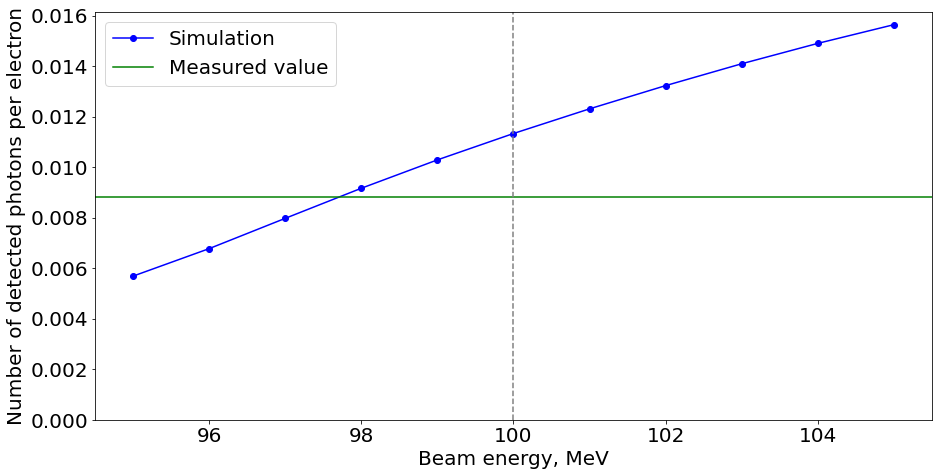

In [27]:
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 20,'legend.fontsize':20})
fig, ax = plt.subplots()
ax.plot(energy_list, tot_flux_list, 'o-', color='b', label="Simulation")
ax.set_xlabel("Beam energy, MeV")
ax.set_ylabel("Number of detected photons per electron")
ax.axhline(meas, label="Measured value", color='green')
ax.axvline(100, linestyle='--', color='grey')
ax.set_ylim(0, ax.get_ylim()[1])
ax.legend()
plt.show()


In [19]:
ebeam = get_from_config("me_MeV")*get_from_config("gamma")
save_to_config("Predicted_photons_per_electron_wigrad", np.interp(ebeam, energy_list, tot_flux_list))

In [18]:
(tot_flux_list[5]-meas)/meas

0.2844834930463641